In [37]:
import pandas as pd

df= pd.read_csv('다음관객_수정.csv')
df

,Unnamed: 0,rating,review,sentiment
0,0,10,현재는시골에서 열댓마리 강아지와 살고있다. 서울서는 지하에 내리 살았어서 그 냄...,1
1,1,9,유럽 친구가 내 의견 궁금하다고 꼭 봐 보래서 구입해서 봐 봤는데\n송강호가 이선균...,1
2,2,10,기분이 나빠진다.\n김선균에게 이입하고 싶지만 송강호인 현실이 슬프다.,1
3,3,10,시대의 명작. 평점이 낮은 이유는 저급한 댓글알바들과 봉준호를 싫어하는 ♪♬들이 여...,1
4,4,10,몇번이나 다시봐도 진짜 명작입니다,1
...,...,...,...,...
6993,8655,1,평점이 좋은 이유를 모르겠네요. ㅎ\n영화보는 눈이 아둔해서 그런가\n무슨 메시지를...,-1
6994,8656,1,이런게 영화면 성냥팔이 소녀의 재림은 신화다 ㅋ,-1
6995,8657,2,별점 1점도 아깝다\n어떤 사람이 이 영화를 봤는데 처음에는 재미 있었지만 나중에는...,-1
6996,8658,10,좌파폭도고발영화.전라도까는 내용이었어.,1


In [40]:
#오차율
print(df[df.rating >= 8][df.sentiment==-1].count())
print(df[df.rating <= 3][df.sentiment==1].count())

print('오차율: ',round((151/6998),2)*100)

Unnamed: 0    65
rating        65
review        65
sentiment     65
dtype: int64
Unnamed: 0    86
rating        86
review        86
sentiment     86
dtype: int64
오차율:  2.0


C:\Users\LG-PC\AppData\Local\Temp\ipykernel_36760\3988086406.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df.rating >= 8][df.sentiment==-1].count())
C:\Users\LG-PC\AppData\Local\Temp\ipykernel_36760\3988086406.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[df.rating <= 3][df.sentiment==1].count())


In [43]:
df['sentiment'].value_counts()

 1    5465
-1    1076
 0     457
Name: sentiment, dtype: int64

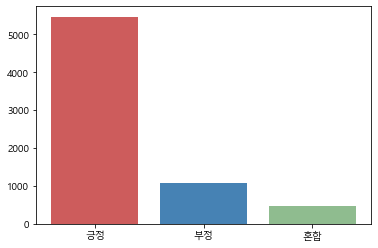

In [54]:
#감성분석 분포
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] ='Malgun Gothic'

x = np.arange(3)

pos= 5465
neg= 1076
neu= 457

values=[pos, neg, neu]
sent=['긍정','부정','혼합']

plt.bar(x, values, color=['indianred','steelblue','darkseagreen'])
plt.xticks(x, sent)

plt.show()

In [57]:
def word_fav(word):
    tot= 0
    pos= 0
    neg= 0
    for rev in df.review:
        if word in rev:
            tot += 1
            if df[df.review==rev]['sentiment'].mean() == 1:
                pos += 1
            elif df[df.review==rev]['sentiment'].mean() == -1:
                neg += -1  
    avg = round((pos + neg)/tot *100, 2)
    return [avg, pos, neg, tot]

In [58]:
#워드클라우드 기반 키워드별 호감도
#감독/봉준호, 현실/사회/장면 등, 배우/연기/송강호 

word = '감독'
f = word_fav(word)
print(f'{word}을 언급한 리뷰의 호감도 평균 :', f[0])
print(f'{word}을 언급한 호감리뷰 수 :', f[1])
print(f'{word}을 언급한 비호감리뷰 수 :', -f[2])
print(f'{word}을 언급한 리뷰 수 :', f[3])

감독을 언급한 리뷰의 호감도 평균 : 69.88
감독을 언급한 호감리뷰 수 : 589
감독을 언급한 비호감리뷰 수 : 104
감독을 언급한 리뷰 수 : 694


In [59]:
word = '봉준호'
f = word_fav(word)
print(f'{word}을 언급한 리뷰의 호감도 평균 :', f[0])
print(f'{word}을 언급한 호감리뷰 수 :', f[1])
print(f'{word}을 언급한 비호감리뷰 수 :', -f[2])
print(f'{word}을 언급한 리뷰 수 :', f[3])

봉준호을 언급한 리뷰의 호감도 평균 : 72.76
봉준호을 언급한 호감리뷰 수 : 492
봉준호을 언급한 비호감리뷰 수 : 70
봉준호을 언급한 리뷰 수 : 580


In [62]:
word = '현실'
f = word_fav(word)
print(f'{word}을 언급한 리뷰의 호감도 평균 :', f[0])
print(f'{word}을 언급한 호감리뷰 수 :', f[1])
print(f'{word}을 언급한 비호감리뷰 수 :', -f[2])
print(f'{word}을 언급한 리뷰 수 :', f[3])

현실을 언급한 리뷰의 호감도 평균 : 79.05
현실을 언급한 호감리뷰 수 : 358
현실을 언급한 비호감리뷰 수 : 41
현실을 언급한 리뷰 수 : 401


In [63]:
word = '사회'
f = word_fav(word)
print(f'{word}을 언급한 리뷰의 호감도 평균 :', f[0])
print(f'{word}을 언급한 호감리뷰 수 :', f[1])
print(f'{word}을 언급한 비호감리뷰 수 :', -f[2])
print(f'{word}을 언급한 리뷰 수 :', f[3])

사회을 언급한 리뷰의 호감도 평균 : 72.7
사회을 언급한 호감리뷰 수 : 296
사회을 언급한 비호감리뷰 수 : 43
사회을 언급한 리뷰 수 : 348


In [64]:
word = '장면'
f = word_fav(word)
print(f'{word}을 언급한 리뷰의 호감도 평균 :', f[0])
print(f'{word}을 언급한 호감리뷰 수 :', f[1])
print(f'{word}을 언급한 비호감리뷰 수 :', -f[2])
print(f'{word}을 언급한 리뷰 수 :', f[3])

장면을 언급한 리뷰의 호감도 평균 : 62.18
장면을 언급한 호감리뷰 수 : 192
장면을 언급한 비호감리뷰 수 : 44
장면을 언급한 리뷰 수 : 238


In [65]:
word = '배우'
f = word_fav(word)
print(f'{word}을 언급한 리뷰의 호감도 평균 :', f[0])
print(f'{word}을 언급한 호감리뷰 수 :', f[1])
print(f'{word}을 언급한 비호감리뷰 수 :', -f[2])
print(f'{word}을 언급한 리뷰 수 :', f[3])

배우을 언급한 리뷰의 호감도 평균 : 73.11
배우을 언급한 호감리뷰 수 : 258
배우을 언급한 비호감리뷰 수 : 35
배우을 언급한 리뷰 수 : 305


In [66]:
word = '연기'
f = word_fav(word)
print(f'{word}을 언급한 리뷰의 호감도 평균 :', f[0])
print(f'{word}을 언급한 호감리뷰 수 :', f[1])
print(f'{word}을 언급한 비호감리뷰 수 :', -f[2])
print(f'{word}을 언급한 리뷰 수 :', f[3])

연기을 언급한 리뷰의 호감도 평균 : 70.51
연기을 언급한 호감리뷰 수 : 373
연기을 언급한 비호감리뷰 수 : 55
연기을 언급한 리뷰 수 : 451


In [67]:
word = '송강호'
f = word_fav(word)
print(f'{word}을 언급한 리뷰의 호감도 평균 :', f[0])
print(f'{word}을 언급한 호감리뷰 수 :', f[1])
print(f'{word}을 언급한 비호감리뷰 수 :', -f[2])
print(f'{word}을 언급한 리뷰 수 :', f[3])

송강호을 언급한 리뷰의 호감도 평균 : 51.2
송강호을 언급한 호감리뷰 수 : 186
송강호을 언급한 비호감리뷰 수 : 58
송강호을 언급한 리뷰 수 : 250
